In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()
    # Conv Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Conv Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Conv Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten
    model.add(Flatten())
    # FC Layer 1
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))
    return model

input_shape = (32, 32, 3)
num_classes = 10

model = build_cnn_model(input_shape, num_classes)
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

C:\Users\sselc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1004s 6us/step


In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2734 - loss: 1.9238 - val_accuracy: 0.5133 - val_loss: 1.3386
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5101 - loss: 1.3705 - val_accuracy: 0.5855 - val_loss: 1.1695
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5867 - loss: 1.1749 - val_accuracy: 0.6191 - val_loss: 1.0736
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6295 - loss: 1.0601 - val_accuracy: 0.6489 - val_loss: 1.0130
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6628 - loss: 0.9640 - val_accuracy: 0.6821 - val_loss: 0.9073
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6804 - loss: 0.9202 - val_accuracy: 0.6829 - val_loss: 0.9185
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7058 - loss: 0.8465 - val_accuracy: 0.7022 - val_loss: 0.8616
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7262 - loss: 0.7977 - 

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7169 - loss: 0.8457
Test Accuracy: 0.7105000019073486


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=(32, 32))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    return image

In [12]:
def classify_image(model, image_path, class_names):
    image = load_and_preprocess_image(image_path)
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)
    return class_names[predicted_class], confidence

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

image_path = 'Labrador.webp'

In [17]:
label, confidence = classify_image(model, image_path, class_names)
print(f"Predicted Label: {label} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label: dog (Confidence: 0.48)


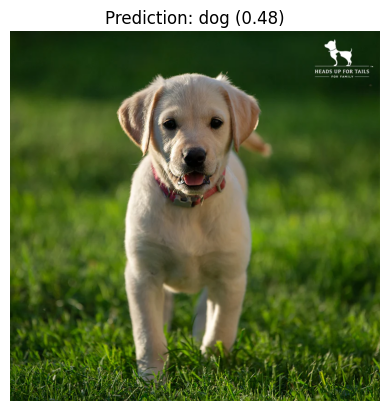

In [18]:
image = load_img(image_path)
plt.imshow(image)
plt.title(f"Prediction: {label} ({confidence:.2f})")
plt.axis('off')
plt.show()
